In [11]:
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [12]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv')
df.isnull().values.any()
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
5,1325318220,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
6,1325318280,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
7,1325318340,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
8,1325318400,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
9,1325318460,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [14]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()
Daily_Price.head()

Date
2011-12-31    4.472579
2012-01-01    4.680778
2012-01-02    5.000000
2012-01-03    5.145917
2012-01-04    5.195443
Name: Weighted_Price, dtype: float64

In [15]:
new_df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Close"])

In [23]:
new_df.head()

,Close,Prediction
Date,,
2011-12-31,4.472579,5.505306
2012-01-01,4.680778,5.603342
2012-01-02,5.000000,5.562427
2012-01-03,5.145917,6.100355
2012-01-04,5.195443,6.200014


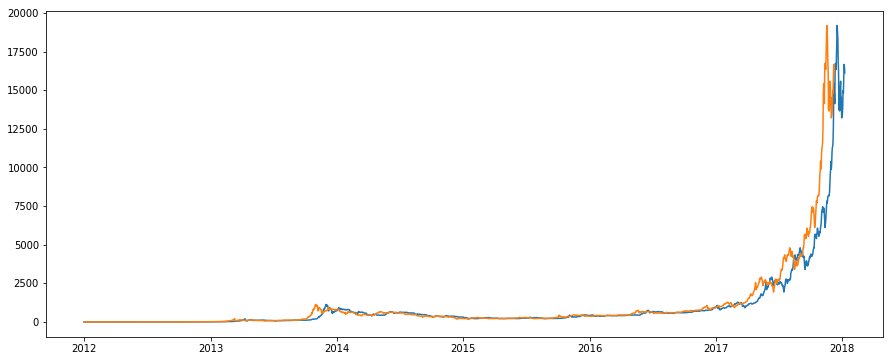

In [24]:
plt.plot(new_df)

In [25]:
# df = df[['Close']]
df=new_df
forecast_out = int(30)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)

cross_validation = clf.predict(X_test)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

confidence:  0.9268953582520982
[20826.59658505 23894.98586365 24681.20340288 24399.09203043
 24102.94646788 25622.6386896  26824.3876171  28326.66126768
 27630.08083974 27038.61760678 24832.34852704 23923.55366437
 20272.84070883 21765.84532383 20114.26207206 20577.46487123
 22473.97079832 22974.21589035 20995.37745685 21420.96970709
 19454.35034375 19646.59561641 19775.19425291 20448.11547345
 22058.07977624 21841.76498198 23287.02469065 24585.36018042
 24364.40124654 23779.69150184]


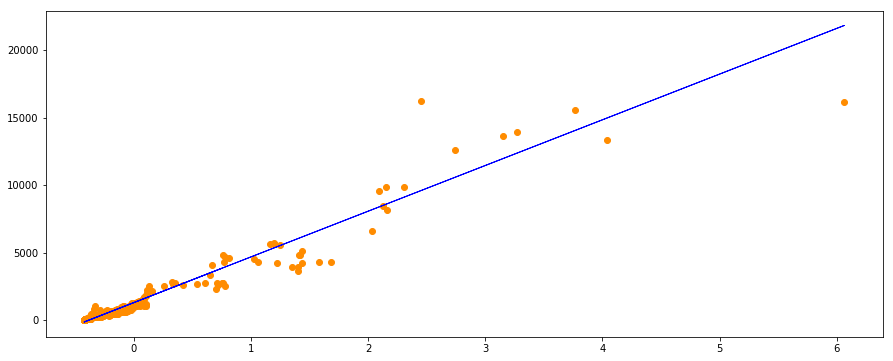

In [27]:
import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_test, cross_validation, color='blue', linewidth=1)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, cross_validation))
print(rms)

604.429803272577


In [64]:
pred={}
forecast_prediction
pred[]

0.9036278554322356

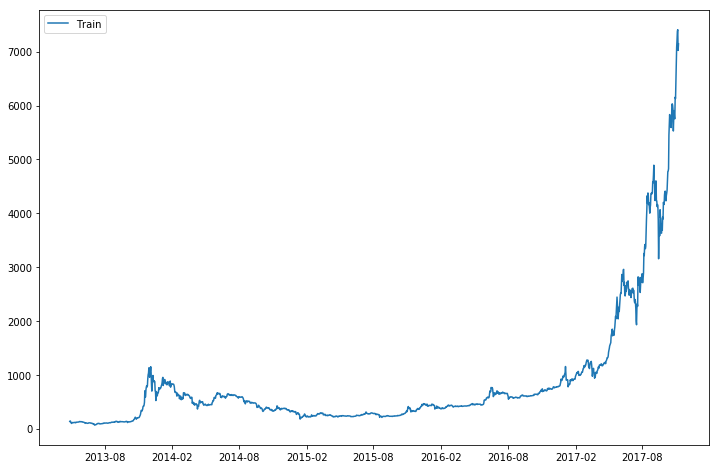

In [61]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label='Train')
# plt.plot(X_test['Close'], label='Test')
# plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()